# BIOS 823 Midterm Exam

- This is a closed book exam, with the exception of the 4 cheat sheets previously specified
- There are 5 questions worth 25 points each - you may attempt all questions, but the maximum number of points you can get is 100
- Points will be deducted for not following PEP 8 coding guidelines and poor coding practices in general
- Points will be deducted for inefficient code - code for each question should take less than 10 seconds to execute

Please print your name below to indicate that you agree to follow the **Duke Honor Code**

NAME:

If you do not print your name, it is an automatic 25 point deduction.

**1**. 25 points

- Create the following `numpy` array $A$ using `fromfunction` (5 points)

```
array([[ 1,  2,  3,  4,  5],
       [ 8,  9, 10, 11, 12],
       [15, 16, 17, 18, 19],
       [22, 23, 24, 25, 26],
       [29, 30, 31, 32, 33],
       [36, 37, 38, 39, 40],
       [43, 44, 45, 46, 47]])
```

- Standardize $A$ to create $B$ (so each row has zero mean and unit standard deviation) (5 points)
- Recreate $B$ by matrix multiplication of two vectors (5 points)
- Find the trace of $BB^T$ (trace is sum of elements on the main diagonal) (5 points) 
- Replace all odd numbers in $A$ with 0 but keep even numbers untouched (5 points)

Note:

If you cannot create the matrix, load it using `A = np.load(ex1.npy)`. You will not receive credit for the first part but can still receive credit for the other parts.

In [1]:
import numpy as np

In [2]:
A = np.fromfunction(lambda i,j: i*7+j+1, (7,5))

In [3]:
B = (A - A.mean(axis=1)[:, None])/A.std(axis=1)[:, None]

In [4]:
B

array([[-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356],
       [-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356],
       [-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356],
       [-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356],
       [-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356],
       [-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356],
       [-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356]])

In [5]:
np.ones((7, 1)) @ B[0][None, :] 

array([[-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356],
       [-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356],
       [-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356],
       [-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356],
       [-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356],
       [-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356],
       [-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356]])

In [6]:
A.mean(axis=1)

array([ 3., 10., 17., 24., 31., 38., 45.])

In [7]:
np.sum(np.diag(B @ B.T))

34.99999999999999

In [8]:
np.where(A % 2 == 1, 0, A)

array([[ 0.,  2.,  0.,  4.,  0.],
       [ 8.,  0., 10.,  0., 12.],
       [ 0., 16.,  0., 18.,  0.],
       [22.,  0., 24.,  0., 26.],
       [ 0., 30.,  0., 32.,  0.],
       [36.,  0., 38.,  0., 40.],
       [ 0., 44.,  0., 46.,  0.]])

**2**. 25 points

For this question, you can assume that the input is an integer.

- Write a function `is_prime` that returns True if a number is prime and false otherwise (5 points)
- Find the number of primes between 1 million and 2 million (5 points)
- Write a function to find the prime factorization of a number - e.g. 28 is 2 * 2 * 7 - function could return (2,2,7) (10 points) 
- Find the prime factors of 123456 (5 points)

In [34]:
def is_prime(n):
    """Check if n is prime."""
    
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    for i in range(3, 1+int(np.sqrt(n)), 2):
        if n % i == 0:
            return False
    return True

In [35]:
sum(is_prime(n) for n in range(1_000_000, 2_000_000))

70435

In [36]:
def prime_factors(n):
    """Find prime facros of n."""
    
    to_check = [i for i in range(2, 1+n) if is_prime(i)]
    factors = []
    for i in to_check:
        while n % i == 0:
            n = n // i
            factors.append(i)
        if n == 1:
            return factors

In [37]:
prime_factors(123456)

[2, 2, 2, 2, 2, 2, 3, 643]

**3**. 25 points

You are given this string

`s = p83FR004B3NF7365hd55766zD7Hjx76260N7B1tL5R07H2Z0J73pPLz2Hzh56pP24nZ4LF8288XD1DbpH1fx6ZXbZ67V76j0j34BX`

- Use regular expressions to create two lists from `s`, one consisting of contiguous letters and the other of contiguous digits. The first list would start [p,FR,...] while the second would start [83,004] (10 points)
- Find all palindromes that are substrings of `s` with length 3 or more (15 points)

In [13]:
s = 'p83FR004B3NF7365hd55766zD7Hjx76260N7B1tL5R07H2Z0J73pPLz2Hzh56pP24nZ4LF8288XD1DbpH1fx6ZXbZ67V76j0j34BX'

In [14]:
import re

In [15]:
digits = re.findall(r'\d+', s)
letters = re.findall(r'[a-zA-Z]+', s)

In [16]:
digits[:5]

['83', '004', '3', '7365', '55766']

In [17]:
letters[:5]

['p', 'FR', 'B', 'NF', 'hd']

In [18]:
n = len(s)
start = 0
palindromes = []
for w in range(3, n+1):
    for i in range(start, n-w+1):
        ss = s[i:(i+w)]
        if ss == ss[::-1]:
            palindromes.append(ss)

In [19]:
palindromes

['626', '828', 'D1D', '7V7', 'j0j', '67V76']

**4**. 25 points

- Read the titanic data set at https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv into a pandas DataFrame (5 points)
- Find the mean and median age by sex and Embarked, showing the result with a flat (non-hierarchical) index (5 points)
- Insert a column Title that contains the honorific (Mr., Mrs., etc) found in the name (5 points)
- Display a DataFrame where the column `Title` comes just before the column `Name`. For full credit, do this **without** manually rearranging column names. (5 points)
- Using `seaborn` show violin plots of the `Age` for each `Sex`, with separate columns for `Survived` as shown below (5 points)

<img src="violin.png" alt="Drawing" style="width: 200px;"/>

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [22]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
df.groupby(['Sex', 'Embarked'])['Age'].agg(['mean', 'median']).reset_index()

,Sex,Embarked,mean,median
0,female,C,28.344262,24.0
1,female,Q,24.291667,21.5
2,female,S,27.771505,27.0
3,male,C,32.998841,30.0
4,male,Q,30.937500,30.0
5,male,S,30.291440,28.0


In [24]:
df['Title'] = df.Name.str.extract(r'\b([A-Z][a-z]*\.)')
name_idx = df.columns.tolist().index('Name')
title_idx = df.columns.tolist().index('Title')
cols = (
    df.columns[:name_idx].tolist() + 
    df.columns[title_idx:(title_idx+1)].tolist() + 
    df.columns[name_idx:title_idx].tolist()
)
df[cols]

,PassengerId,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr.,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs.,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss.,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs.,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr.,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev.,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Miss.,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Miss.,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Mr.,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
import seaborn as sns

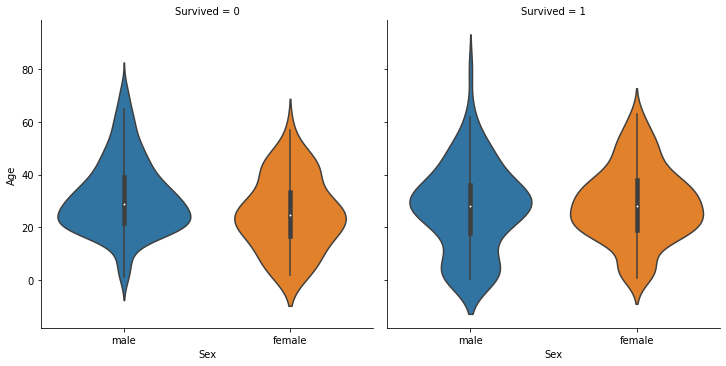

In [26]:
p = sns.catplot(data=df, x='Sex', y='Age', col='Survived', kind='violin')

**5**. 25 points

- Connect to the `Chinook.db` SQLite3 database using either sql magic or `sqlite3` (5 points)
- Show the names of the tables in the database (5 points)
- Show the first 5 rows of the `Playlist`, `PlaylistTrack` and `Track` tables (5 points)
- How many tracks are there in the `90’s Music` playlist? For full credit, your query must use the string `90’s Music`. (10 points)

In [1]:
%load_ext sql

In [2]:
%sql sqlite:///Chinook.db

In [3]:
%%sql

SELECT name FROM sqlite_master WHERE type = 'table'

 * sqlite:///Chinook.db
Done.


name
Album
Artist
Customer
Employee
Genre
Invoice
InvoiceLine
MediaType
Playlist
PlaylistTrack


In [4]:
%%sql

SELECT * FROM Playlist LIMIT 5;

 * sqlite:///Chinook.db
Done.


PlaylistId,Name
1,Music
2,Movies
3,TV Shows
4,Audiobooks
5,90’s Music


In [31]:
%%sql

SELECT * FROM PlaylistTrack LIMIT 5;

 * sqlite:///Chinook.db
Done.


PlaylistId,TrackId
1,3402
1,3389
1,3390
1,3391
1,3392


In [32]:
%%sql

SELECT * FROM Track LIMIT 5;

 * sqlite:///Chinook.db
Done.


TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman",230619,3990994,0.99
4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman",252051,4331779,0.99
5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [7]:
%%sql

SELECT DISTINCT COUNT(TrackId)
FROM PlaylistTrack
INNER JOIN Playlist
ON PlaylistTrack.PlaylistId = PlayList.PlaylistId
WHERe Playlist.Name = '90’s Music'

 * sqlite:///Chinook.db
Done.


COUNT(TrackId)
1477
